# Tracé de la caractéristique courant-tension d'une source de tension

<div class = 'alert alert-warning'>Importation des modules de calcul et de tracé de courbe.
    </div>

In [1]:
# import de la bibliothèque numpy (gestion de matrices et routines mathématiques) en lui donnant le surnom np
import numpy as np
# import de la bibliothèque matplotlib (graphiques) en lui donnant le surnom plt
import matplotlib.pyplot as plt

<div class = 'alert alert-warning'>Tableaux des valeurs des mesures de tension et de l'intensité du courant délivré par une pile en V et en A
    </div>

In [4]:
U_V = np.array([2.38, 2.33, 2.26, 2.21, 2.17, 2.13, 2.09, 2.01, 1.87, 1.62, 1.52, 1.44, 1.37, 1.28, 1.23, 1.18])
I_A = np.array([0, 0.05, 0.16, 0.25, 0.32, 0.37, 0.46, 0.56, 0.79, 1.2, 1.42, 1.49, 1.6, 1.73, 1.82, 1.89 ])*10**(-3)


<div class = 'alert alert-warning'>
    Utilisation de la fonction <code class = "python">plot</code> pour tracer la courbe.<br>
<code class = "python">plot</code> reçoit 3 arguments : <br>
- la liste des valeurs en abscisses contenues dans un tableau numpy : <code class = "python">np.array([])</code><br>
- la liste des valeurs en ordonnées contenues dans un tableau numpy.<br>
- une chaîne de caractère qui précise le type de marquage : <code class = "python">"bo"</code> pour "gros point bleu"
    </div>

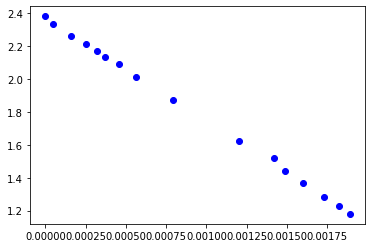

In [5]:
plt.plot(I_A, U_V,"bo")

plt.show() # affiche la figure a l'ecran

 <div class = 'alert alert-warning'><h4>Amélioration de la présentation du graphe</h4></div>

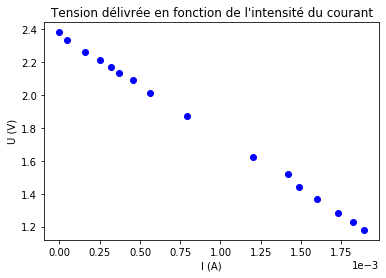

In [18]:
# Tracé de la caractéristique avec titre, axes et unités

plt.plot(I_A, U_V, "bo")

# Ecriture scientifique pour l'affichage de l'intensité
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (A)")
plt.ylabel("U (V)")

plt.title("Tension délivrée en fonction de l'intensité du courant")
plt.show()


<div class = 'alert alert-warning'><h3>Importation de la fonction <code class = "python">linregress</code> du module <code class = "python">scipy.stats</code></h3></div>

In [19]:
# import de la bibliothèque pour faire une régression linéaire

from scipy.stats import linregress



## Modélisation par une droite affine


<div class = 'alert alert-warning'>
Calcul du coefficient directeur et de l'ordonnée à l'origine de la droite obtenue par regression linéaire (méthode qui minimise la distance entre les points et la droite)
</div>

In [20]:
# Regression linéaire pour la modélisation
regression=linregress(I_A,U_V)
pente=regression[0]
ordonnee_origine = regression[1]

print ("E_g = ",ordonnee_origine,"V")
print ("r_g = ",abs(pente), chr(937))


E_g =  2.3673840162590967 V
r_g =  622.8309185078344 Ω


<div class = 'alert alert-warning'><h4>Mise en forme du résultat</h4></div>

In [22]:
pente_a = round(pente,2)
ordonnee_origine_a = round (ordonnee_origine,2)

print ("E_g = ",ordonnee_origine_a,"V")
print ("r_g = ",abs(pente_a), chr(937))

E_g =  2.37 V
r_g =  622.83 Ω


<div class = 'alert alert-warning'><h4>Tracé de la droite modélisant la relation entre la tension et l'intensité</h4></div>

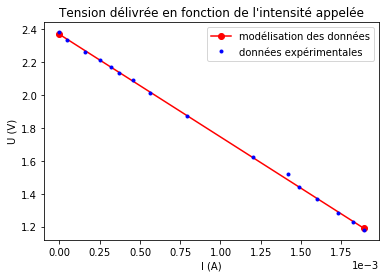

In [39]:
# On veut tracer la régression linéaire sur les points issus des données
# valeur minimum des abscisses  
mn=np.min(I_A)
# valeur maximum des abscisses 
mx=np.max(I_A)

I_mod = np.array([mn,mx])
U_mod=ordonnee_origine + pente*I_mod

plt.plot(I_mod, U_mod,'-or', label="modélisation des données")
plt.plot(I_A, U_V, "b.", label="données expérimentales")
# Ecriture scientifique pour l'affichage de l'intensité
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (A)")
plt.ylabel("U (V)")
plt.legend() 
plt.title("Tension délivrée en fonction de l'intensité appelée")

plt.show() 

<div class = 'alert alert-warning'><h4>Mise en forme du graphe</h4></div>

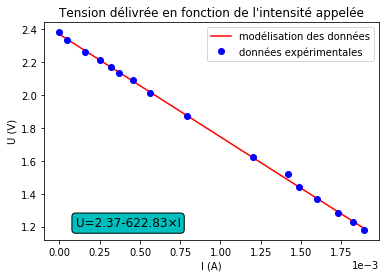

In [38]:
# Tracé avec affichage de l'équation de la droite
plt.plot(I_mod, U_mod,'-r',label="modélisation des données")
plt.plot(I_A, U_V, "bo", label="données expérimentales")
# Ecriture scientifique pour l'affichage de l'intensité
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("I (A)")
plt.ylabel("U (V)")
plt.legend() 
plt.title("Tension délivrée en fonction de l'intensité appelée")

# Affichage de la pente et de l'ordonnée à l'origine sur le graphique
#(le signe multiplié est codé par le caractère Unicode 215) dans une boite de texte.
# On renseigne les coordonnées d'affichage de la boite de texte et le texte à afficher
plt.text(0.0001,1.2,"U=" + str(ordonnee_origine_a)+ str(pente_a)+ chr(215)+"I"
        ,size=12,  
         # On crée une boite aux coins ronds, au bord noir et remplie en cyan 
         bbox=dict(boxstyle="round",ec=("k"),fc=("c")))

plt.savefig('source-tension_U_I.png')